In [1]:
#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# #ML Library
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [4]:
df.shape

(4981, 11)

number of columns = 11 and number of rows = 4981    (range from 0 to 4980)

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

# EDA cleaning the data

In [9]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

this above data is clear

# EDA analysis the data

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


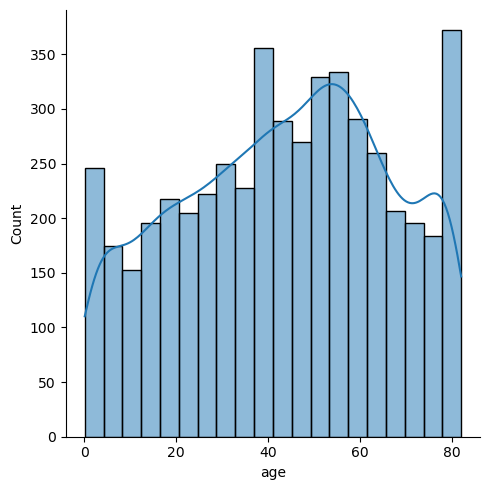

In [10]:
# craete a histoplot of age
sns.displot(data=df, x="age", kde=True)

This picture shows the distribution is right skewed, with fewer individuals in the younger and older age groups.


<Axes: xlabel='age'>

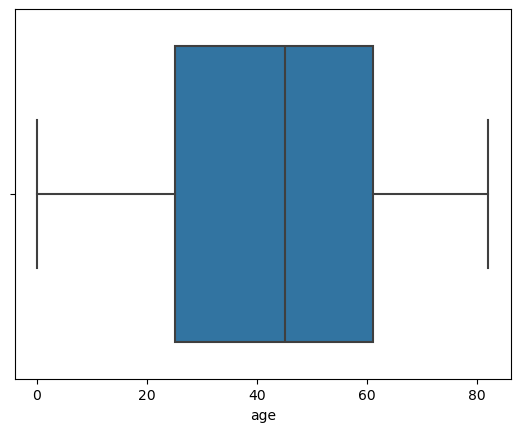

In [11]:
# creating a boxplot of age
sns.boxplot(x=df["age"])


This box plot represents the distribution of ages in a dataset. The median age is around 50, with most ages ranging between 30 and 65. There are no significant outliers.

<Axes: xlabel='stroke', ylabel='age'>

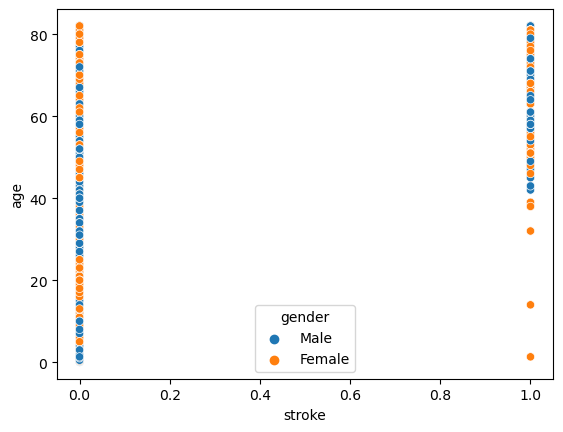

In [12]:
# Draw Scatterplot of stroke and age
sns.scatterplot(data=df, x="stroke", y="age", hue = "gender")


The scatterplot shows that stroke occurrence (1) is more common among older individuals, with no significant gender difference in stroke distribution across age groups.

<Axes: xlabel='stroke', ylabel='age'>

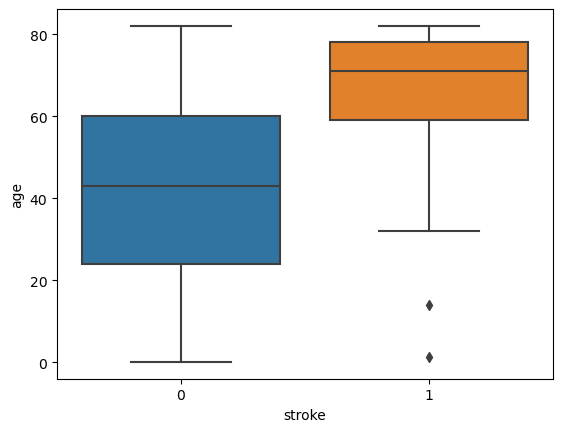

In [13]:
# creating a boxplot
sns.boxplot(data=df, x="stroke", y="age",)


The boxplot shows that individuals who had a stroke (1) are generally older, with a higher median age and less variability in age compared to those who did not have a stroke (0).

<Axes: xlabel='hypertension', ylabel='heart_disease'>

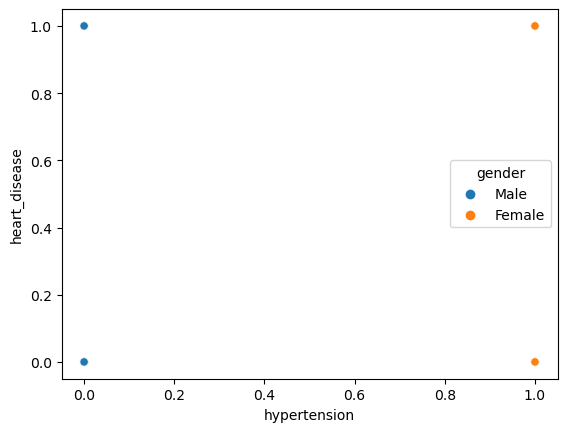

In [14]:
# scatter plot of hypertension and heart_disease 
sns.scatterplot(data=df, x="hypertension", y="heart_disease", hue = "gender")


Scatter plot shows the relationship between gender, hypertension and heart disease. Males are more likely to have hypertension than females, but there is no significant difference in heart disease rates between the genders.

<Axes: xlabel='hypertension', ylabel='heart_disease'>

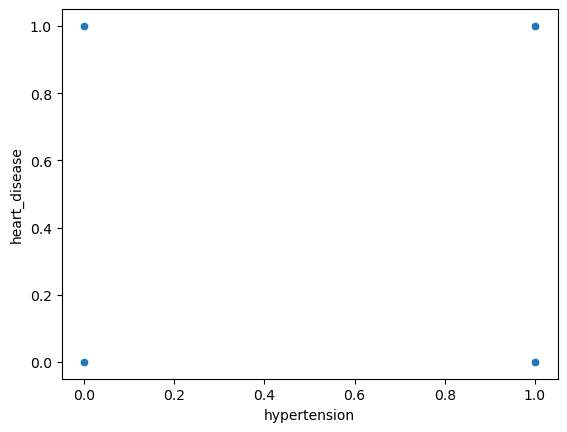

In [15]:
#scattetrplot
sns.scatterplot(data=df, x="hypertension", y="heart_disease",)


The figure shows a correlation between hypertension and heart disease. Individuals with hypertension have a higher likelihood of developing heart disease.

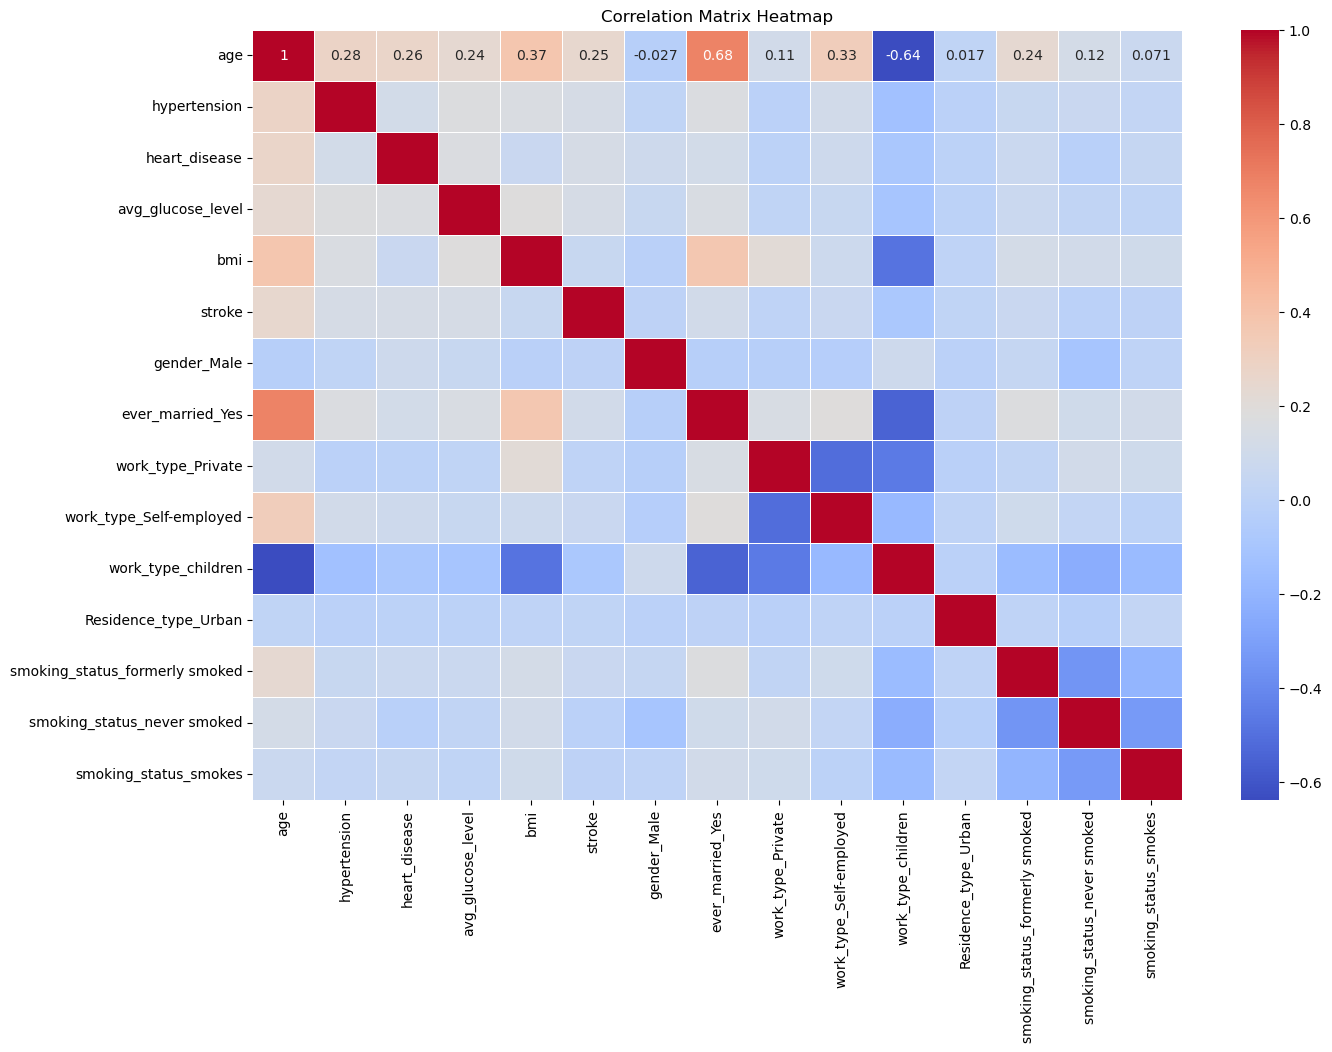

In [16]:
#correlation
# # One-Hot Encoding for Correlation Matrix
data_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = data_encoded.corr()

# # # Heatmap of correlation matrix

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


This heatmap shows 0.25 which is weak positive correlation between age and stroke.